In [ ]:
!sudo apt-get install unzip
!unzip archive.zip -d .

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Archive:  archive.zip
  inflating: ./Student_Performance.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the Dataset
The dataset has 6 (5 + 1 constant) variables and the target parameter is Performance Index

In [ ]:
df = pd.read_csv("Student_Performance.csv")
df['Extracurricular Activities'] = df['Extracurricular Activities'].apply(lambda x: 1 if x=='Yes' else 0)

In [ ]:
df['constant'] = 1
df['train'] = 1

## Splitting the Data
80-20 Split

In [ ]:
df.loc[df.sample(2000).index,'train'] = 0
df_train = df[df['train'] == 1].drop('train',axis=1)
df_test = df[df['train'] == 0].drop('train',axis=1)

In [ ]:
X_train,y_train = np.array(df_train.drop('Performance Index',axis=1)),np.array(df_train['Performance Index'])

In [ ]:
X_test,y_test = np.array(df_test.drop('Performance Index',axis=1)),np.array(df_test['Performance Index'])

## Finding coefficients
$$ \min_{\beta} (Y-X^T β)^2 $$
$$ -X^T(Y-X^T\beta) = 0 $$
$$ β = (X^TX)^{-1}X^TY $$

In [ ]:
m = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train

In [ ]:
m

array([  2.85462987,   1.01864187,   0.60862005,   0.47185575,
         0.19757644, -34.06259042])

In [ ]:
y_pred = m@X_test.T

## Goodness of Fit
$$ R^2 = {ESS \over ESS + RSS}$$
$$ adj R^2 = { ESS (n-p) \over TSS (n-1)} $$

In [ ]:
RSS = ((y_pred-y_test)**2).sum()
ESS = ((y_pred-y_test.mean())**2).sum()
adjR2 = ESS*(2000-6) / ((ESS + RSS) * (2000-1))

In [ ]:
adjR2

0.9865952909969009

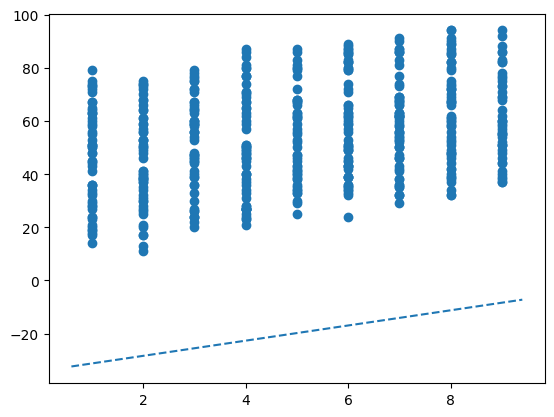

In [18]:
sample = df.sample(500)
plt.scatter(sample[['Hours Studied']],sample[['Performance Index']])
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = m[-1] + m[0] * x_vals
plt.plot(x_vals, y_vals, '--')